Tweet (labeled positive, negative, neutral)

build a classifier, assess train/test performance (split)

In [1]:
import pandas as pd

In [2]:
tweet = pd.read_csv('AirlineTweets.csv')
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df = tweet[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
inputs = df['text']
labels = df['airline_sentiment']

<AxesSubplot:>

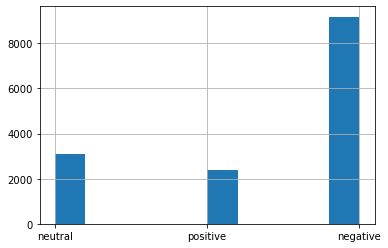

In [5]:
labels.hist()

In [6]:
import numpy as np
np.random.seed(157)

In [7]:
from sklearn.model_selection import train_test_split
input_train, input_test, ytrain, ytest = train_test_split(inputs, labels)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorize = CountVectorizer(lowercase = True, max_features = 2000)

Xtrain = vectorize.fit_transform(input_train)
Xtest = vectorize.transform(input_test)

In [10]:
Xtrain

<10980x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 157341 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(multi_class='multinomial', max_iter=500)

model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print('Train acc:', accuracy_score(ytrain, pred_train))
print('Test acc:', accuracy_score(ytest, pred_test))

Train acc: 0.8919854280510018
Test acc: 0.7901639344262295


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion matrix for training data: 
 [[0.95467013 0.03738992 0.00793995]
 [0.19473684 0.74912281 0.05614035]
 [0.09080654 0.0783982  0.83079526]]


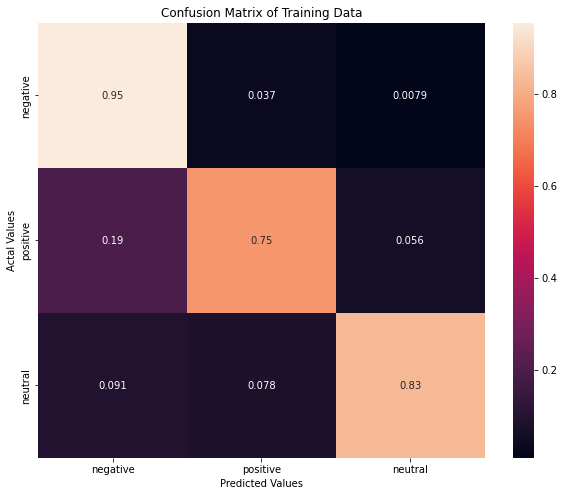

In [16]:
cm_train = confusion_matrix(ytrain, pred_train, normalize = 'true')
print('Confusion matrix for training data:','\n', cm_train)

cm_train_df = pd.DataFrame(cm_train, 
                           index = ['negative','positive','neutral'],
                           columns = ['negative','positive','neutral'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_train_df, annot=True)
plt.title('Confusion Matrix of Training Data')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Confusion matrix for testing data: 
 [[0.88316304 0.08485118 0.03198578]
 [0.31013431 0.60561661 0.08424908]
 [0.17457627 0.13389831 0.69152542]]


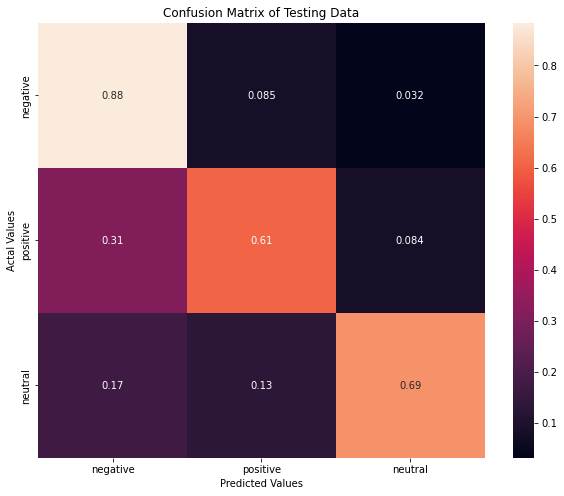

In [18]:
cm_test = confusion_matrix(ytest, pred_test,normalize = 'true')
print('Confusion matrix for testing data:','\n',cm_test)

cm_test_df = pd.DataFrame(cm_test, 
                           index = ['negative','positive','neutral'],
                           columns = ['negative','positive','neutral'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_test_df, annot=True)
plt.title('Confusion Matrix of Testing Data')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
#f1 score
from sklearn.metrics import f1_score

print('Train F1-Score:', f1_score(ytrain, pred_train,average = 'weighted'))
print('Test F1-Score:', f1_score(ytest, pred_test,average = 'weighted'))

Train F1-Score: 0.890343552346057
Test F1-Score: 0.7875990032876109


In [20]:
#AUC
from sklearn.metrics import roc_auc_score

pred_train_prob = model.predict_proba(Xtrain)
pred_test_prob = model.predict_proba(Xtest)

print('Train AUC:', roc_auc_score(ytrain, pred_train_prob, average = 'weighted',multi_class = 'ovo'))
print('Test AUC:', roc_auc_score(ytest, pred_test_prob, average = 'weighted', multi_class = 'ovo'))

Train AUC: 0.9702183294128428
Test AUC: 0.9022451969818066


#### Only considering binary class for positive and negative sentiment

In [21]:
df2 = tweet[['airline_sentiment','airline_sentiment_confidence','text']]
df2.head()

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...


In [22]:
neutral = df2[df2['airline_sentiment'] == 'neutral']
subset = df2[df2['airline_sentiment'] != 'neutral']
neutral.head()

,airline_sentiment,airline_sentiment_confidence,text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
7,neutral,0.6340,@VirginAmerica Really missed a prime opportuni...
10,neutral,0.6769,@VirginAmerica did you know that suicide is th...
23,neutral,1.0000,@VirginAmerica will you be making BOS&gt;LAS n...


In [23]:
neutral.loc[neutral['airline_sentiment_confidence'] < 0.5, 'airline_sentiment'] = 'negative'
neutral.loc[neutral['airline_sentiment_confidence'] >= 0.5, 'airline_sentiment'] = 'positive'

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
neutral

,airline_sentiment,airline_sentiment_confidence,text
0,positive,1.0000,@VirginAmerica What @dhepburn said.
2,positive,0.6837,@VirginAmerica I didn't today... Must mean I n...
7,positive,0.6340,@VirginAmerica Really missed a prime opportuni...
10,positive,0.6769,@VirginAmerica did you know that suicide is th...
23,positive,1.0000,@VirginAmerica will you be making BOS&gt;LAS n...
...,...,...,...
14607,positive,1.0000,@AmericanAir i need someone to help me out
14611,positive,1.0000,"@AmericanAir guarantee no retribution? If so, ..."
14632,positive,0.6760,"“@AmericanAir: @TilleyMonsta George, that does..."
14637,positive,1.0000,@AmericanAir Please bring American Airlines to...


In [25]:
df3 = neutral.append(subset)
df3.head()

,airline_sentiment,airline_sentiment_confidence,text
0,positive,1.0000,@VirginAmerica What @dhepburn said.
2,positive,0.6837,@VirginAmerica I didn't today... Must mean I n...
7,positive,0.6340,@VirginAmerica Really missed a prime opportuni...
10,positive,0.6769,@VirginAmerica did you know that suicide is th...
23,positive,1.0000,@VirginAmerica will you be making BOS&gt;LAS n...


<AxesSubplot:>

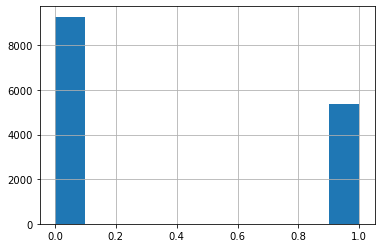

In [26]:
inputs = df3['text']
labels = df3['airline_sentiment'].map({'positive':1, 'negative':0})

labels.hist()

In [27]:
input_train, input_test, ytrain, ytest = train_test_split(inputs, labels)

vectorize = CountVectorizer(lowercase = True,  max_features = 2000)

Xtrain = vectorize.fit_transform(input_train)
Xtest = vectorize.transform(input_test)

model = LogisticRegression(max_iter=500)

model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print('Train acc:', accuracy_score(ytrain, pred_train))
print('Test acc:', accuracy_score(ytest, pred_test))

Train acc: 0.9022768670309654
Test acc: 0.8314207650273224


Confusion matrix for training data: 
 [[6459  486]
 [ 587 3448]]
Confusion matrix for testing data: 
 [[2033  302]
 [ 315 1010]]


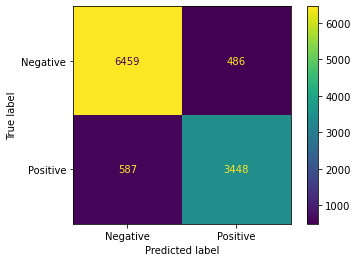

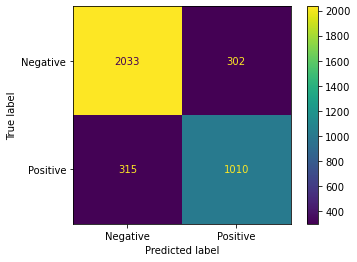

In [28]:
cm_train = confusion_matrix(ytrain, pred_train)
print('Confusion matrix for training data:','\n', cm_train)

from sklearn.metrics import ConfusionMatrixDisplay

cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = ['Negative','Positive'])
cm_display_train.plot()

cm_test = confusion_matrix(ytest, pred_test)
print('Confusion matrix for testing data:','\n',cm_test)

cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = ['Negative','Positive'])
cm_display_test.plot()

In [29]:
#f1
print('Train F1-Score:', f1_score(ytrain, pred_train))
print('Test F1-Score:', f1_score(ytest, pred_test))

Train F1-Score: 0.8653532438198017
Test F1-Score: 0.7660219946909367


In [30]:
#AUC
pred_train_prob = model.predict_proba(Xtrain)
pred_test_prob = model.predict_proba(Xtest)

print('Train AUC:', roc_auc_score(ytrain, pred_train_prob[:,1]))
print('Test AUC:', roc_auc_score(ytest, pred_test_prob[:,1]))

Train AUC: 0.9619048944485928
Test AUC: 0.9035922588986305


#### Plot the most positive and negative words

In [31]:
df3.head()

,airline_sentiment,airline_sentiment_confidence,text
0,positive,1.0000,@VirginAmerica What @dhepburn said.
2,positive,0.6837,@VirginAmerica I didn't today... Must mean I n...
7,positive,0.6340,@VirginAmerica Really missed a prime opportuni...
10,positive,0.6769,@VirginAmerica did you know that suicide is th...
23,positive,1.0000,@VirginAmerica will you be making BOS&gt;LAS n...


In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize(label):
    words = ''
    for msg in df[df['airline_sentiment'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

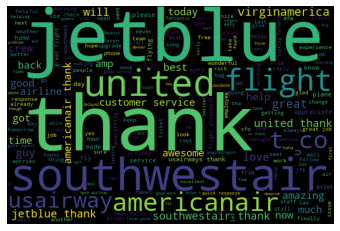

In [33]:
visualize('positive')

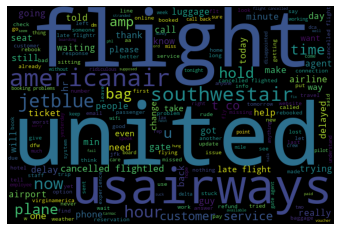

In [38]:
visualize('negative')

#### Intrepret the model with weight

In [35]:
model.coef_

array([[-0.44515726, -0.17529847,  0.0933207 , ..., -0.09665808,
        -0.94272937,  0.16200519]])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   5.,  11.,  30.,  41.,
         60.,  95., 132., 209., 259., 265., 282., 204., 169., 106.,  58.,
         39.,  10.,  10.,   5.,   4.,   0.,   1.,   2.]),
 array([-3.3638116 , -3.16661169, -2.96941177, -2.77221186, -2.57501195,
        -2.37781203, -2.18061212, -1.98341221, -1.78621229, -1.58901238,
        -1.39181247, -1.19461255, -0.99741264, -0.80021273, -0.60301281,
        -0.4058129 , -0.20861299, -0.01141307,  0.18578684,  0.38298675,
         0.58018667,  0.77738658,  0.9745865 ,  1.17178641,  1.36898632,
         1.56618624,  1.76338615,  1.96058606,  2.15778598,  2.35498589,
         2.5521858 ]),
 <BarContainer object of 30 artists>)

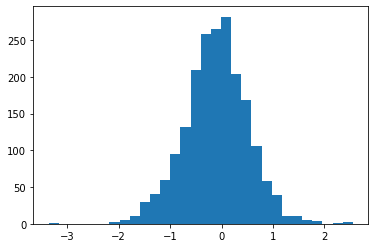

In [36]:
plt.hist(model.coef_[0], bins = 30)

In [37]:
word_index_map = vectorize.vocabulary_
word_index_map

{'americanair': 134,
 'you': 1993,
 'guys': 832,
 'are': 174,
 'totally': 1783,
 'losing': 1077,
 'me': 1120,
 've': 1876,
 'been': 243,
 'an': 139,
 'aa': 69,
 'fan': 675,
 'for': 755,
 'years': 1986,
 'but': 294,
 'telling': 1726,
 'reps': 1463,
 'busy': 293,
 'and': 140,
 'hanging': 844,
 'up': 1851,
 'on': 1257,
 'is': 966,
 'really': 1432,
 'bad': 222,
 'jetblue': 982,
 'do': 554,
 'know': 1000,
 'when': 1934,
 'the': 1737,
 'schedule': 1530,
 '2015': 20,
 'will': 1943,
 'be': 238,
 'united': 1845,
 'stuck': 1680,
 'here': 880,
 'in': 936,
 'iah': 922,
 'waiting': 1893,
 'flight': 723,
 'to': 1773,
 'hours': 908,
 'due': 581,
 'maintenance': 1102,
 'issues': 970,
 'could': 443,
 'we': 1915,
 'have': 857,
 'gotten': 824,
 'new': 1209,
 'plane': 1348,
 'fail': 669,
 'southwestair': 1639,
 'extremely': 664,
 'disappointed': 539,
 'with': 1950,
 'poor': 1367,
 'customer': 471,
 'service': 1563,
 'provided': 1402,
 'after': 100,
 'cancelled': 311,
 'flighting': 728,
 'my': 1195,
 'toda

In [49]:
threshold = 1.5

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word,weight)

Most positive words:
thanks 1.6118344806748923
thank 2.48584121055198
great 1.5332689162357962
wonderful 2.3495187039586187
love 1.7649033209870848
easy 1.5239709982170144
48 1.5670254086770214
amazing 1.6208543243346325
worries 2.5521858030004334
awesome 1.747149864701327
kudos 1.9245922055811744
excellent 1.9482264279547785
impressed 1.5985531068509904
promo 1.8916389380723182


In [50]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word,weight)

Most negative words:
stuck -1.7647859273422393
hours -1.7241498034374771
fail -1.6357163379871378
disappointed -1.7920814385098718
terrible -1.6401729111658616
rude -1.6326056161786449
delayed -1.8390253392008222
delay -1.7002813044317793
answer -1.9472169172929028
nothing -1.9537168066799238
doesn -1.7038648558796687
missed -1.502497764037878
stop -1.69595235994983
worst -3.363811601951669
ridiculous -2.138644785772272
lost -1.5701742321802228
forced -1.5082623227042506
unless -1.575021733158266
suck -1.7617117039537762
lose -1.5221236996828993
communication -1.5205878970398012
worse -1.5897783363354672
broken -2.1145941620756985
third -1.6657398682511366
solution -1.555767879697875
hire -1.559709693982652
frustrated -1.8521047001039013
fucking -1.5054708933619283
canned -1.513670687136566


#### Find the most-wrong tweets for both classes

In [51]:
X = vectorize.transform(df3['text'])
df3['predictions'] = model.predict(X)

In [52]:
df3.head()

,airline_sentiment,airline_sentiment_confidence,text,predictions
0,positive,1.0000,@VirginAmerica What @dhepburn said.,1
2,positive,0.6837,@VirginAmerica I didn't today... Must mean I n...,1
7,positive,0.6340,@VirginAmerica Really missed a prime opportuni...,1
10,positive,0.6769,@VirginAmerica did you know that suicide is th...,1
23,positive,1.0000,@VirginAmerica will you be making BOS&gt;LAS n...,1


In [58]:
wrong_positive = df3[(df3['predictions'] == 1) & (df3['airline_sentiment'] == 'negative')]['text']

for msg in wrong_positive:
    print(msg)

@VirginAmerica is saving my sanity right now: http://t.co/ELtBOLjUl9
@VirginAmerica YES FYI  MY BFF
@united Done and done
Just sent thank u RT @united: @goodenufmother Please DM your confirmation number if reFlight Booking Problems is needed. Thank you. ^EY
@united Thank you, ^JH, appreciate the prompt responses--me and other passengers will be doing so.
@united @scotthroth scott, need a good book suggestion?
@united on a flight at 11:30 tomorrow.
@united Didn't know that buying a seat in first class was just a 'request' to sit in first class! Very Interesting.
@united Home is Calgary can you get us there without the added expense of accommodations and meals.
@united Will do! Thanks!
@united I'll be impressed if I actually get a response! 😜
@united Thanks. UA1121, DEN, 40 min on tarmac.
@United Airlines' CEO Jeff Smisek: Disloyal to Loyal Workers http://t.co/0cevY3P42b via @HuffPostBiz
@SouthwestAir you should have assigned seating, because now my cousin &amp; I probably can't sit toge

In [59]:
wrong_negative = df3[(df3['predictions'] == 0) & (df3['airline_sentiment'] == 'positive')]['text']

for msg in wrong_negative:
    print(msg)

@VirginAmerica I have an unused ticket but moved to a new city where you don't fly. How can I fly with you before it expires? #travelhelp
@VirginAmerica I &lt;3 Flying VA But Life happens and I am trying to #change my trip JPERHI  Can you help.VA home page will not let me ?
@VirginAmerica hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?
@VirginAmerica is your website ever coming back online?
@VirginAmerica Having an issue finding a missing item on a plane. Can you help me find which airport my plane headed to next?
@VirginAmerica This is what you missed @NewsVP. Next trip to the 407.
@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.
@virginamerica Digging the swanky pink mood lighting during the flight from NYC to SFO.  Just needs a cabaret singer.  Think about it!
@VirginAmerica - can you tweet me the Cancelled Flight/chng fee for a flight? or ca